# Projeto 1 - Ciência dos Dados -- Esse notebook SUJO mostra a minha tentativa de plotar os gráficos sem função.

#### Feito por: Gabriel Kabbani

# Motivação: 

O projeto é inspirado pela verificação dos objetivos econômicos da União Européia. Em seus objetivos, constam os seguintes: 

1. Desenvolvimento sustentável baseado no crescimento econômico equilibrado e na estabilidade de preços, uma economia de mercado altamente competitiva com pleno emprego e progresso social, e proteção ambiental.

2. Reforçar a coesão económica, social e territorial e a solidariedade entre os países da UE.

Dessa forma, é interessante verificar até que ponto a suposta "coesão econômica" e o "crescimento econômico equilibrado" de fato fazem um impacto na economia. Para isso, esse projeto será destinado à comparação de índices econômicos entre os países que participam da União Européia e aqueles que não fazem parte.

# Pergunta:

Com relação à totalidade dos países no mundo, com ênfase nos europeus, existe uma vantagem econômica por estar na União Européia, considerando PIB, exportações, e investimento estrangeiro?

# Bases de dado utilizadas:

Bases de dado do gapminder utilizadas:
1. Foreign Direct Investment Net Inflows as Percent of GDP.
2. Exports as Percent of GDP.
3. GDP Per Capita US Inflation Adjusted.
4. HDI Human Development Index.

Todas podem ser encontradas no seguinte link: https://www.gapminder.org/data/

# Hipótese e Mecanismo:

Considerando os objetivos mencionados acima, pode se dizer que o participar da União Européia, o comércio com os outros países participantes é bastante facilitado, algo que não somente aumenta os mercados consumidores, mas que também estimula a economia local e os investimentos estrangeiros nela, fazendo com que o PIB e a quantidade de exportações sejam maiores. Essa hipótese foi em parte fundamentada por pesquisas que exploram os benefícios da União Européia, como a disponível no site 'econ.economicshelp.org', referenciada no final do projeto. 

Para responder a pergunta e verificar a hipótese acima, vou analisar os anos 2010, 2014, e 2017 de todos os países cujos dados estão disponíveis, para ter uma análise geral referente à esta última década, começando após a crise de 2008, para mostrar o impacto da união ao longo do tempo, mesmo em períodos de recuperação, mas sem ter os dados possívelmente influenciados de maneira considerável pela crise, algo que poderia ter acontecido caso anos anteriores fossem escolhidos. Vale ressaltar que o foco da análise é a tendência de cada índice durante a década de 2010, especialmente no início (que mostra o período depois da crise), e devido a isso foram utilizados somente estes anos, ao invés de todos os anos disponíveis, uma vez que eles já conseguem prover a noção necessária sobre o período. Ademais, para analisá-los, vou utilizar o PIB per capita (ajustado pela inflação americana ao longo dos anos), a quantidade de investimento estrangeiro sendo alocado no país, como porcentagem do PIB, e as o capital decorrido de exportações, também como porcentagem do PIB. Estes indicadores possibilitam diversar análises sobre a situação econômica do país, sendo ótimas ferramentas responder a pergunta acima.

Mais especificamente, os indicadores serão utilizados para comparar a variação entre os três grupos de países (que pertencem à União Européia, que são europeus mas não pertencem, e os países não europeus) ao decorrer dos anos escolhidos. Assim, poderei investigar a inclinação com qual cresce os indicadores de cada grupo, para ver as diferenças no desenvolvimento econômico médio entre eles. Além disso, poderei investigar como cada observação pode ou não ser resultado do pertencimento à união, e se o crescimento ocorre somente nos países mais desenvolvidos. Para isso, utilizarei o Índice de Desenvolvimento Humano, adicionando uma outra camada de análises, para ter certeza de que um eventual crescimento ocorre devido à União Européia, e não somente pelo país ser mais desenvolvido. Infelizmente, só estão disponíveis os dados de IDH até 2015 (a partir disso somente poucos países podem ser facilmente integrados, algo que comprometeria a análise), então essa análise com relação ao desenvolvimento será limitada aos anos de 2010 e 2014. 

# Montagem do database:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
print (os.getcwd())

/Users/Kabbani/Desktop/Insper/Ciência dos Dados/P1/P1_GIT/Projeto-1-CD-Gabriel-Kabbani-


In [4]:
dados_export = pd.read_excel('exports_percent_of_gdp.xlsx')
dados_gdp = pd.read_excel('gdppercapita_us_inflation_adjusted.xlsx')
dados_fdi = pd.read_excel('foreign_direct_investment_net_inflows_percent_of_gdp.xlsx')
dados_idh= pd.read_excel('hdi_human_development_index.xlsx')

In [5]:
dados_gdp.insert(1, "EU", 0)
dados_gdp.loc[(dados_gdp.country == 'Albania') | (dados_gdp.country == 'Andorra') | (dados_gdp.country == 'Belarus') | (dados_gdp.country == 'Bosnia and Herzegovina') | (dados_gdp.country == 'Iceland') | (dados_gdp.country == 'Liechtenstein') | (dados_gdp.country == 'Macedonia') | (dados_gdp.country == 'Moldova') | (dados_gdp.country == 'Monaco') | (dados_gdp.country == 'Montenegro') | (dados_gdp.country == 'Norway')| (dados_gdp.country == 'Russia') | (dados_gdp.country == 'San Marino') | (dados_gdp.country == 'Serbia') | (dados_gdp.country == 'Switzerland') | (dados_gdp.country == 'Turkey') | (dados_gdp.country == 'Ukraine') , ['EU']]='1'
dados_gdp.loc[(dados_gdp.country == 'Austria') | (dados_gdp.country == 'Belgium')| (dados_gdp.country == 'Bulgaria')| (dados_gdp.country == 'Croatia')| (dados_gdp.country == 'Cyprus')| (dados_gdp.country == 'Czech Republic') | (dados_gdp.country == 'Denmark') | (dados_gdp.country == 'Estonia') | (dados_gdp.country == 'Finland') | (dados_gdp.country == 'France') | (dados_gdp.country == 'Germany') | (dados_gdp.country == 'Greece') | (dados_gdp.country == 'Hungary') | (dados_gdp.country == 'Ireland') | (dados_gdp.country == 'Italy') | (dados_gdp.country == 'Latvia') | (dados_gdp.country == 'Lithuania') | (dados_gdp.country == 'Luxembourg') | (dados_gdp.country == 'Malta') | (dados_gdp.country == 'Netherlands') | (dados_gdp.country == 'Poland') | (dados_gdp.country == 'Portugal') | (dados_gdp.country == 'Romania') | (dados_gdp.country == 'Slovak Republic') | (dados_gdp.country == 'Slovenia') | (dados_gdp.country == 'Spain') | (dados_gdp.country == 'Sweden') | (dados_gdp.country == 'United Kingdom'),['EU']] = '2'
dados_gdp.EU= dados_gdp.EU.astype('category')
dados_gdp.EU.cat.categories=['Não-Europeu','Europeu-não-participante','Participante']

In [6]:
gdp_2010_14_17 = dados_gdp.loc[:,['country',"EU",2010,2014,2017]]
exp_2010_14_17 = dados_export.loc[:,['country',2010,2014,2017]]
fdi_2010_14_17 = dados_fdi.loc[:,['country',2010,2014,2017]]
idh_2010_13_15 = dados_idh.loc[:,['country',2010,2014]]

In [7]:
gdp = gdp_2010_14_17.set_index('country')     #('GDP per capita inflation-adjusted')
exp = exp_2010_14_17.set_index('country')     #('Exports as % of GDP')
fdi = fdi_2010_14_17.set_index('country')     #('Foreign Direct Investment as % of GDP')
idh = idh_2010_13_15.set_index('country')

In [8]:
data = gdp.join(exp, how='inner', lsuffix='_PIB', rsuffix='_Exports')
data = data.join(fdi,how='inner', rsuffix='_FDI')
data.rename(columns={2010:"2010_FDI",2014:"2014_FDI",2017:"2017_FDI","EU":"UE"}, inplace=True)
data = data.join(idh,how='inner', rsuffix='_IDH')
data.rename(columns={2010:"2010_IDH",2014:"2014_IDH"}, inplace=True)
data.head()

,UE,2010_PIB,2014_PIB,2017_PIB,2010_Exports,2014_Exports,2017_Exports,2010_FDI,2014_FDI,2017_FDI,2010_IDH,2014_IDH
country,,,,,,,,,,,,
Afghanistan,Não-Europeu,553,630.0,618.0,10.0,6.57,NaN,1.20,0.208,0.256,0.454,0.479
Albania,Europeu-não-participante,4090,4410.0,4870.0,28.0,28.20,31.5,9.14,8.690,7.840,0.738,0.762
Algeria,Não-Europeu,4460,4680.0,4830.0,38.4,30.20,24.0,1.43,0.703,0.705,0.724,0.743
Angola,Não-Europeu,3530,3750.0,3480.0,62.3,48.00,29.9,-3.91,1.520,-5.960,0.495,0.531
Antigua and Barbuda,Não-Europeu,12200,12400.0,13600.0,45.5,46.10,NaN,8.39,3.360,3.970,0.782,0.784


Como pode se evidenciar na célula abaixo, quatro países europeus não participantes estão faltando na tabela, devido à falta de dados, que comprometeria severamente a análise. Mesmo assim, a análise continua válida sem esses países pelo fato de ainda haverem vários outros para fornecer os dados necessários.

In [9]:
data.UE.value_counts()

Não-Europeu                 139
Participante                 28
Europeu-não-participante     12
Name: UE, dtype: int64

# Análise dos Dados:

In [10]:
uniao= data[data.UE == 'Participante']
euro= data[data.UE == 'Europeu-não-participante']
ne= data[data.UE == 'Não-Europeu']


data.describe()

,2010_PIB,2014_PIB,2017_PIB,2010_Exports,2014_Exports,2017_Exports,2010_FDI,2014_FDI,2017_FDI,2010_IDH,2014_IDH
count,179.000000,177.00000,175.000000,176.000000,176.000000,140.000000,179.000000,178.000000,174.000000,179.000000,179.000000
mean,12388.016760,13024.59322,13702.468571,40.872722,42.404375,41.720357,6.521645,4.357730,4.064777,0.677419,0.695547
std,17862.157767,18289.42942,19134.098953,26.815091,28.193350,28.934315,16.082814,5.711605,6.623986,0.158107,0.154734
min,231.000000,243.00000,213.000000,0.109000,1.830000,7.740000,-16.000000,-4.850000,-29.400000,0.323000,0.347000
25%,1340.000000,1650.00000,1895.000000,23.800000,25.275000,24.675000,1.420000,1.202500,1.392500,0.542500,0.575000
50%,4560.000000,5430.00000,5560.000000,35.300000,37.000000,35.450000,3.040000,2.790000,2.805000,0.710000,0.724000
75%,13300.000000,14700.00000,15700.000000,50.825000,50.875000,48.925000,6.055000,5.755000,5.390000,0.797500,0.804500
max,105000.000000,107000.00000,108000.000000,200.000000,208.000000,230.000000,160.000000,34.300000,48.600000,0.939000,0.948000


## PIB:

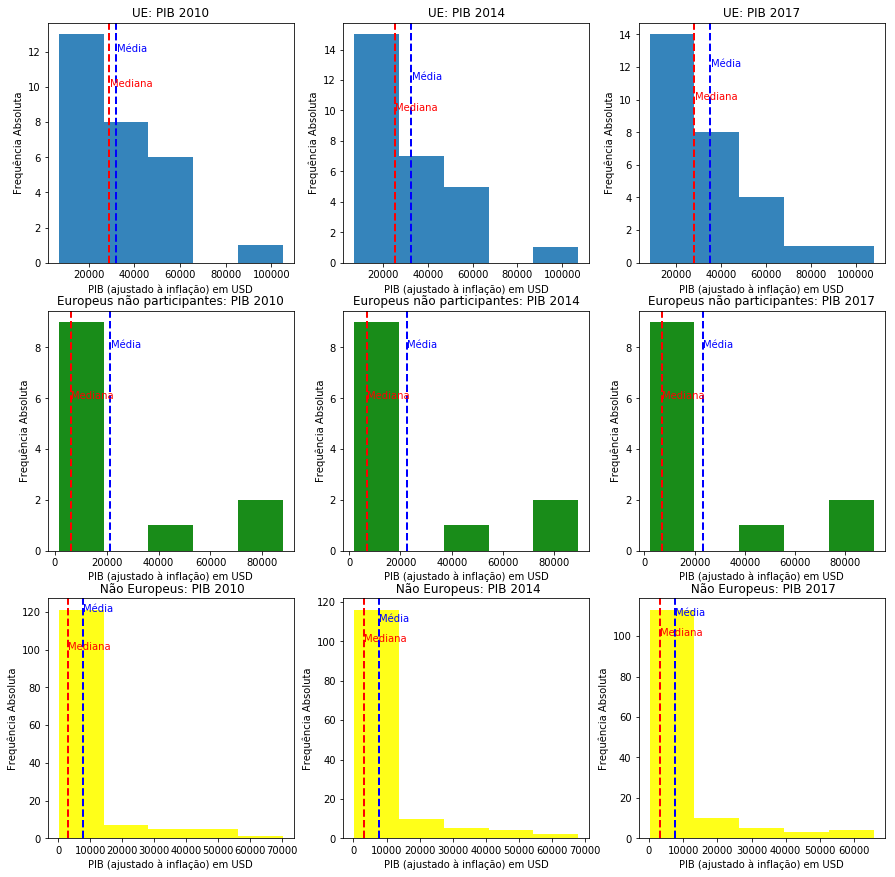

In [11]:
faixa= range(213000000,108000000000,10) #nao consegui usar

def verticalLine(plot, x, y, color, nome):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color) 

fig = plt.figure(figsize=(15, 15))
plt.subplot(331)
plot = uniao['2010_PIB'].plot.hist(bins=5, title='UE: PIB 2010', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('PIB (ajustado à inflação) em USD')
verticalLine(plot, uniao['2010_PIB'].mean(), 12, "b", "Média")
verticalLine(plot, uniao['2010_PIB'].median(), 10, "r", "Mediana")

plt.subplot(332)
plot = uniao['2014_PIB'].plot.hist(bins=5, title='UE: PIB 2014', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('PIB (ajustado à inflação) em USD')
verticalLine(plot, uniao['2014_PIB'].mean(), 12, "b", "Média")
verticalLine(plot, uniao['2014_PIB'].median(), 10, "r", "Mediana")

plt.subplot(333)
plot = uniao['2017_PIB'].plot.hist(bins=5, title='UE: PIB 2017', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('PIB (ajustado à inflação) em USD')
verticalLine(plot, uniao['2017_PIB'].mean(), 12, "b", "Média")
verticalLine(plot, uniao['2017_PIB'].median(), 10, "r", "Mediana")

plt.subplot(334)
plot = euro['2010_PIB'].plot.hist(bins=5, title='Europeus não participantes: PIB 2010', alpha=0.9, color = 'g')
plt.ylabel('Frequência Absoluta')
plt.xlabel('PIB (ajustado à inflação) em USD')
verticalLine(plot, euro['2010_PIB'].mean(), 8, "b", "Média")
verticalLine(plot, euro['2010_PIB'].median(), 6, "r", "Mediana")

plt.subplot(335)
plot = euro['2014_PIB'].plot.hist(bins=5, title='Europeus não participantes: PIB 2014', alpha=0.9, color = 'g')
plt.ylabel('Frequência Absoluta')
plt.xlabel('PIB (ajustado à inflação) em USD')
verticalLine(plot, euro['2014_PIB'].mean(), 8, "b", "Média")
verticalLine(plot, euro['2014_PIB'].median(), 6, "r", "Mediana")

plt.subplot(336)
plot = euro['2017_PIB'].plot.hist(bins=5, title='Europeus não participantes: PIB 2017', alpha=0.9, color = 'g')
plt.ylabel('Frequência Absoluta')
plt.xlabel('PIB (ajustado à inflação) em USD')
verticalLine(plot, euro['2017_PIB'].mean(), 8, "b", "Média")
verticalLine(plot, euro['2017_PIB'].median(), 6, "r", "Mediana")

plt.subplot(337)
plot = ne['2010_PIB'].plot.hist(bins=5, title=' Não Europeus: PIB 2010', alpha=0.9, color='yellow')
plt.ylabel('Frequência Absoluta')
plt.xlabel('PIB (ajustado à inflação) em USD')
verticalLine(plot, ne['2010_PIB'].mean(), 120, "b", "Média")
verticalLine(plot, ne['2010_PIB'].median(), 100, "r", "Mediana")

plt.subplot(338)
plot = ne['2014_PIB'].plot.hist(bins=5, title=' Não Europeus: PIB 2014', alpha=0.9, color='yellow')
plt.ylabel('Frequência Absoluta')
plt.xlabel('PIB (ajustado à inflação) em USD')
verticalLine(plot, ne['2010_PIB'].mean(), 110, "b", "Média")
verticalLine(plot, ne['2010_PIB'].median(), 100, "r", "Mediana")

plt.subplot(339)
plot = ne['2017_PIB'].plot.hist(bins=5, title=' Não Europeus: PIB 2017', alpha=0.9, color='yellow')
plt.ylabel('Frequência Absoluta')
plt.xlabel('PIB (ajustado à inflação) em USD')
verticalLine(plot, ne['2010_PIB'].mean(), 110, "b", "Média")
verticalLine(plot, ne['2010_PIB'].median(), 100, "r", "Mediana")

plt.show()

# Conclusão:

# Referências:

https://econ.economicshelp.org/2007/03/benefits-of-european-union.html

https://europa.eu/european-union/about-eu/eu-in-brief_en

https://www.gapminder.org/data/